In [1]:
import pandas as pd
import requests
import urllib3
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

activities = 'https://www.strava.com/api/v3/athlete/activities'
auth_url = "https://www.strava.com/oauth/token"

In [2]:
payload = {
    'client_id': "90629",
    'client_secret': 'dac647219a4e276d758fe38ffb52906e4d5144d8', 
    'refresh_token': '04119dc851c6419a8fbc4f0c205f672cbc1a1bc0',
    'grant_type': "refresh_token",
    'f': 'json'}

res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']

print(res)

C:\Users\Eduardo\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.strava.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>


In [3]:
my_dataset = pd.DataFrame()
empty_page = True
page = 1
while empty_page:
    header = {'Authorization': 'Bearer ' + access_token}
    param = {'per_page': 200, 'page': page}
    page_dataset = requests.get(activities, headers=header, params=param).json()
    my_dataset = pd.concat([my_dataset,pd.DataFrame(page_dataset)], ignore_index = True)
    empty_page = bool(page_dataset)
    if bool(page_dataset):
        print('\n Página:',page)
    else:
        print("\n Parando")
    page += 1
print("\n {} recordes carregados!".format(len(my_dataset)))


 Página: 1

 Página: 2

 Parando

 254 recordes carregados!


In [4]:
my_dataset['start_date'] = pd.to_datetime(my_dataset['start_date'],infer_datetime_format = True)
my_dataset


,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed
0,2,"{'id': 50591613, 'resource_state': 1}",Corrida ao entardecer,5502.7,1676,1680,40.0,Run,Run,3.0,...,True,253.0,223.0,8070511382,8070511382,3084534578-1659396919-run.gpx,False,0,0,False
1,2,"{'id': 50591613, 'resource_state': 1}",Caminhada ao entardecer,5950.2,4065,4149,39.0,Walk,Walk,NaN,...,True,223.0,193.0,8070511301,8070511301,3084534578-1658791358-walk.gpx,False,0,0,False
2,2,"{'id': 50591613, 'resource_state': 1}",Trilha a tarde,862.4,868,936,15.0,Hike,Hike,NaN,...,True,267.0,251.0,8000535753,8000535753,3084534578-1658093706-hike.gpx,False,0,0,False
3,2,"{'id': 50591613, 'resource_state': 1}",Trilha a tarde,1019.5,1269,1422,22.0,Hike,Hike,NaN,...,True,116.0,103.0,8000535708,8000535708,3084534578-1658087954-hike.gpx,False,0,0,False
4,2,"{'id': 50591613, 'resource_state': 1}",Corrida ao entardecer,1372.2,421,430,17.0,Run,Run,NaN,...,True,240.0,223.0,7974737095,7974737095,3084534578-1658011041-run.gpx,False,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2,"{'id': 50591613, 'resource_state': 1}",Caminhada matutina,6278.9,1905,1998,38.2,Walk,Walk,NaN,...,False,5.3,-2.3,3290240258,3290240258,None,False,0,2,False
250,2,"{'id': 50591613, 'resource_state': 1}",Caminhada matutina,3624.2,2329,2448,13.5,Walk,Walk,NaN,...,False,5.0,-389.7,3287010348,3287010348,None,False,0,3,False
251,2,"{'id': 50591613, 'resource_state': 1}",Caminhada matutina na barra,6670.7,2089,2913,40.4,Run,Run,3.0,...,False,5.3,-2.3,3284258946,3284258946,None,False,2,1,False
252,2,"{'id': 50591613, 'resource_state': 1}",Corrida no almoço,6822.0,2122,2384,32.2,Run,Run,0.0,...,False,5.2,-1.8,3281378117,3281378117,None,False,0,1,False


In [5]:
my_dataset.head(20)

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed
0,2,"{'id': 50591613, 'resource_state': 1}",Corrida ao entardecer,5502.7,1676,1680,40.0,Run,Run,3.0,...,True,253.0,223.0,8070511382,8070511382,3084534578-1659396919-run.gpx,False,0,0,False
1,2,"{'id': 50591613, 'resource_state': 1}",Caminhada ao entardecer,5950.2,4065,4149,39.0,Walk,Walk,NaN,...,True,223.0,193.0,8070511301,8070511301,3084534578-1658791358-walk.gpx,False,0,0,False
2,2,"{'id': 50591613, 'resource_state': 1}",Trilha a tarde,862.4,868,936,15.0,Hike,Hike,NaN,...,True,267.0,251.0,8000535753,8000535753,3084534578-1658093706-hike.gpx,False,0,0,False
3,2,"{'id': 50591613, 'resource_state': 1}",Trilha a tarde,1019.5,1269,1422,22.0,Hike,Hike,NaN,...,True,116.0,103.0,8000535708,8000535708,3084534578-1658087954-hike.gpx,False,0,0,False
4,2,"{'id': 50591613, 'resource_state': 1}",Corrida ao entardecer,1372.2,421,430,17.0,Run,Run,NaN,...,True,240.0,223.0,7974737095,7974737095,3084534578-1658011041-run.gpx,False,0,0,False
5,2,"{'id': 50591613, 'resource_state': 1}",Corrida vespertina,1388.8,397,401,0.0,Run,Run,NaN,...,True,244.0,226.0,7974737073,7974737073,3084534578-1658006636-run.gpx,False,0,0,False
6,2,"{'id': 50591613, 'resource_state': 1}",Corrida ao entardecer,6191.9,1935,1935,37.0,Run,Run,NaN,...,True,258.0,230.0,7963093086,7963093086,3084534578-1657838837-run.gpx,False,0,0,False
7,2,"{'id': 50591613, 'resource_state': 1}",Corrida ao entardecer,5420.7,1747,1752,40.0,Run,Run,NaN,...,True,245.0,218.0,7945045853,7945045853,3084534578-1657580324-run.gpx,False,0,0,False
8,2,"{'id': 50591613, 'resource_state': 1}",Corrida ao entardecer,1659.4,518,1381,23.0,Run,Run,NaN,...,True,242.0,219.0,7945045299,7945045299,3084534578-1657578397-run.gpx,False,0,0,False
9,2,"{'id': 50591613, 'resource_state': 1}",Trilha matinal,3404.2,4517,8876,53.0,Hike,Hike,NaN,...,True,242.0,189.0,7945045111,7945045111,3084534578-1657456461-hike.gpx,False,0,3,False


In [6]:
runs = my_dataset[my_dataset['type'] == 'Run']

In [7]:
my_dataset.columns

Index(['resource_state', 'athlete', 'name', 'distance', 'moving_time',
       'elapsed_time', 'total_elevation_gain', 'type', 'sport_type',
       'workout_type', 'id', 'start_date', 'start_date_local', 'timezone',
       'utc_offset', 'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'map', 'trainer', 'commute', 'manual', 'private',
       'visibility', 'flagged', 'gear_id', 'start_latlng', 'end_latlng',
       'average_speed', 'max_speed', 'average_cadence', 'has_heartrate',
       'average_heartrate', 'max_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed'],
      dtype='object')

In [46]:
my_dataset[['average_speed', 'distance',"max_speed", 'moving_time']][my_dataset['type'] == 'Run']

,average_speed,distance,max_speed,moving_time
0,3.283,5502.7,4.312,1676
4,3.259,1372.2,4.065,421
5,3.498,1388.8,4.676,397
6,3.200,6191.9,4.881,1935
7,3.103,5420.7,5.351,1747
...,...,...,...,...
245,3.232,8337.5,5.600,2580
248,3.233,6320.9,5.700,1955
251,3.193,6670.7,6.500,2089
252,3.215,6822.0,5.500,2122


In [66]:
def plotador(coluna):
    r = runs[["start_date", coluna]].groupby(runs['start_date'].dt.to_period('M')).mean()
    fig, ax = plt.subplots(figsize=(20, 10), facecolor='white')
    ax.set_facecolor("xkcd:white")
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
    ax.tick_params(axis='x', labelsize=12, labelrotation = 45)
    ax = sns.barplot(data = r, x = r.index , y = coluna)
    plt.ylabel("MÉDIA DE " + str(coluna).upper())
    
    return ax

C:\Users\Eduardo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:xlabel='start_date', ylabel='MÉDIA DA DISTANCE'>

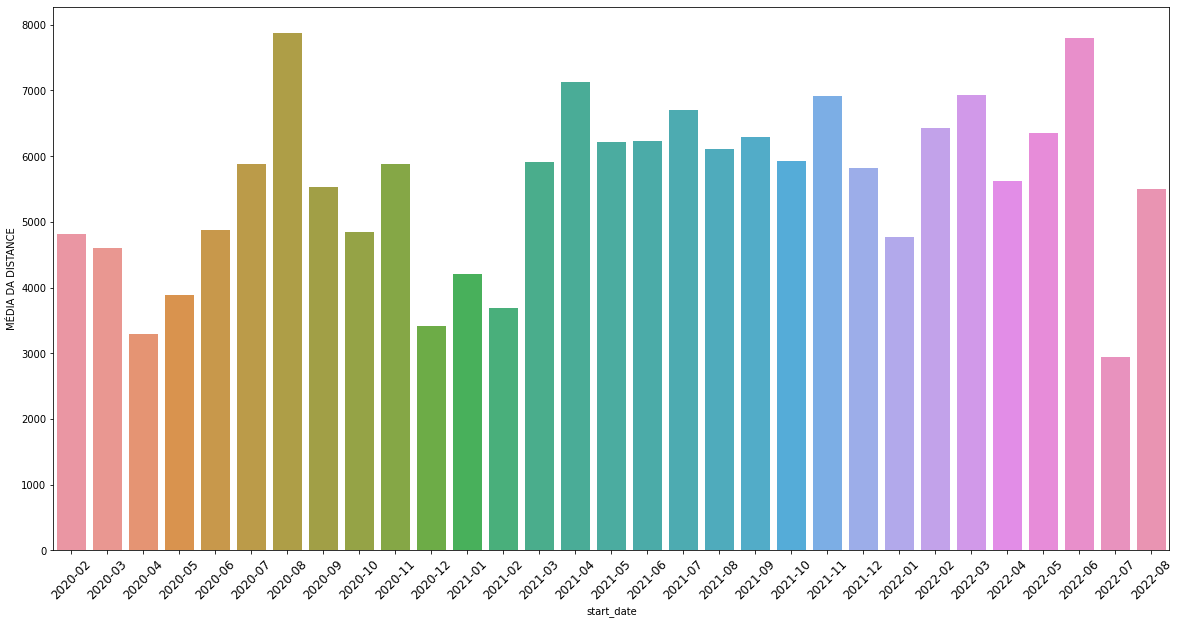

In [67]:
plotador('distance')

C:\Users\Eduardo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


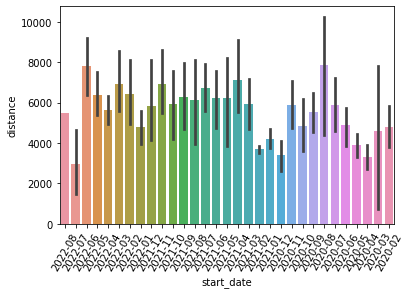

In [10]:
#my_dataset = my_dataset.groupby(my_dataset['start_date'].dt.to_period('M')).sum('distance')


    

ax = sns.barplot(x = runs['start_date'].dt.to_period('M'), y = my_dataset['distance'])
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
